In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive (3).zip to archive (3).zip


In [ ]:
import zipfile
import os

# Original file name
zip_path = "archive (3).zip"

# Create custom folder with your name
output_folder = "Vindhya_Files"

# Unzip into your folder
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(output_folder)

# Show the files inside your folder
os.listdir(output_folder)


['brain_tumor_dataset', 'yes', 'no']

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    "Vindhya_Files/brain_tumor_dataset",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    "Vindhya_Files/brain_tumor_dataset",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# Convolutional layer
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

# Inko layer
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten + Dense layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))  # 2 classes: yes/no


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
import os
print(os.listdir('/content'))


['.config', 'Vindhya_Files', 'archive (3).zip', 'sample_data']


In [ ]:
import zipfile

zip_path = "/content/archive (3).zip"  # your zip file name
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/")


In [ ]:
import os
print(os.listdir('/content'))


['.config', 'Vindhya_Files', 'brain_tumor_dataset', 'archive (3).zip', 'yes', 'no', 'sample_data']


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    '/content',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 201 images belonging to 6 classes.


In [ ]:
import os
print(os.listdir('/content'))


['.config', 'Vindhya_Files', 'brain_tumor_dataset', 'archive (3).zip', 'yes', 'no', 'sample_data']


In [ ]:
import os
import shutil

# Create new clean dataset folder
os.makedirs('/content/final_dataset/yes', exist_ok=True)
os.makedirs('/content/final_dataset/no', exist_ok=True)

# Move the folders
shutil.move('/content/yes', '/content/final_dataset/yes')
shutil.move('/content/no', '/content/final_dataset/no')


'/content/final_dataset/no/no'

In [ ]:
import shutil
import os

# Move images from nested yes/yes to final_dataset/yes
yes_src = '/content/final_dataset/yes/yes'
yes_dst = '/content/final_dataset/yes'

for file_name in os.listdir(yes_src):
    shutil.move(os.path.join(yes_src, file_name), yes_dst)

os.rmdir(yes_src)  # remove the empty folder

# Move images from nested no/no to final_dataset/no
no_src = '/content/final_dataset/no/no'
no_dst = '/content/final_dataset/no'

for file_name in os.listdir(no_src):
    shutil.move(os.path.join(no_src, file_name), no_dst)

os.rmdir(no_src)  # remove the empty folder


In [ ]:
print(os.listdir('/content/final_dataset/yes')[:5])  # should show image files
print(os.listdir('/content/final_dataset/no')[:5])   # should show image files


['Y70.jpg', 'Y9.jpg', 'Y6.jpg', 'Y107.jpg', 'Y53.jpg']
['no 9.png', '49 no.jpg', '34 no.jpg', '45 no.jpg', 'No20.jpg']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    '/content/final_dataset',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/final_dataset',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [ ]:
model.fit(
    train_generator,
    epochs=10,  # you can increase to 15 or 20 later
    validation_data=validation_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6137 - loss: 2.2221 - val_accuracy: 0.7200 - val_loss: 0.6258
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 900ms/step - accuracy: 0.6648 - loss: 0.5987 - val_accuracy: 0.7400 - val_loss: 0.5210
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7717 - loss: 0.5084 - val_accuracy: 0.7600 - val_loss: 0.5515
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 910ms/step - accuracy: 0.8388 - loss: 0.4258 - val_accuracy: 0.7400 - val_loss: 0.5215
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8522 - loss: 0.3685 - val_accuracy: 0.7400 - val_loss: 0.4697
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 926ms/step - accuracy: 0.8862 - loss: 0.2737 - val_accuracy: 0.8000 - val_loss: 0.4634
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 923ms/step - accuracy: 0.9429 - loss: 0.1848 - val_accuracy: 0.8000 - val_loss: 0.4753
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9659 - loss: 0.1156 - val_accuracy: 0.8400 - val_loss: 0.4466
Ep

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive (3).zip to archive (3) (1).zip


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


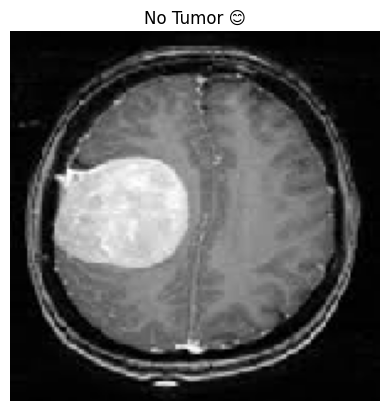

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Image path
img_path = '/content/brain_tumor_dataset/yes/Y1.jpg'  # ✅ Naa path already undi

# Step 2: Load and preprocess the image
img = image.load_img(img_path, target_size=(150, 150))  # Resize to model input size
img_array = image.img_to_array(img)  # Convert to numpy array
img_array = np.expand_dims(img_array, axis=0)  # Expand to match model input shape
img_array = img_array / 255.0  # Normalize

# Step 3: Prediction
prediction = model.predict(img_array)

# Step 4: Output display
if prediction[0][0] > 0.5:
    result = "Tumor Detected 😟"
else:
    result = "No Tumor 😊"

# Step 5: Show result with image
plt.imshow(img)
plt.title(result)
plt.axis('off')
plt.show()


In [ ]:
print("Raw Prediction:", prediction)


Raw Prediction: [[9.0963050e-04 9.9909043e-01]]


In [ ]:
img.save("output_result.jpg")
